In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = np.loadtxt("data.csv", delimiter=";", dtype=int)

In [3]:
years = data[:, 0]
population = data[:, 1]

In [4]:
poly1_vander = np.array(years,dtype=np.double)
poly2_vander = np.array(years-1900,dtype=np.double)
poly3_vander = np.array(years-1940,dtype=np.double)
poly4_vander = np.array((years-1940)/40,dtype=np.float64)

In [6]:
#Tworzenie macierzy
matrix1 = np.vander(poly1_vander, increasing=True)
matrix2 = np.vander(poly2_vander, increasing=True)
matrix3 = np.vander(poly3_vander, increasing=True)
matrix4 = np.vander(poly4_vander, increasing=True)

In [15]:
matrix4

array([[ 1.00000000e+00, -1.00000000e+00,  1.00000000e+00,
        -1.00000000e+00,  1.00000000e+00, -1.00000000e+00,
         1.00000000e+00, -1.00000000e+00,  1.00000000e+00],
       [ 1.00000000e+00, -7.50000000e-01,  5.62500000e-01,
        -4.21875000e-01,  3.16406250e-01, -2.37304688e-01,
         1.77978516e-01, -1.33483887e-01,  1.00112915e-01],
       [ 1.00000000e+00, -5.00000000e-01,  2.50000000e-01,
        -1.25000000e-01,  6.25000000e-02, -3.12500000e-02,
         1.56250000e-02, -7.81250000e-03,  3.90625000e-03],
       [ 1.00000000e+00, -2.50000000e-01,  6.25000000e-02,
        -1.56250000e-02,  3.90625000e-03, -9.76562500e-04,
         2.44140625e-04, -6.10351562e-05,  1.52587891e-05],
       [ 1.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 1.00000000e+00,  2.50000000e-01,  6.25000000e-02,
         1.56250000e-02,  3.90625000e-03,  9.765625

In [19]:
cond_matrix1 = np.linalg.cond(matrix1)
cond_matrix2 = np.linalg.cond(matrix2)
cond_matrix3 = np.linalg.cond(matrix3)
cond_matrix4 = np.linalg.cond(matrix4)


dtype('float64')

In [8]:
#Współczynniki uwarunkowania
print(cond_matrix1)
print(cond_matrix2)
print(cond_matrix3)
print(cond_matrix4)

3.00219582582814e+36
6306565084492795.0
9315536054612.764
1605.4437004786996


In [32]:
#Schemat Hornera
interpolation_factors = np.linalg.solve(matrix4, population)
phi4 = np.vectorize(lambda t, j: np.double(((t-1940)/40)**(j-1)), excluded=['j'])

def horner(base, factors):
    n = len(factors) - 1
    W = factors[-1]
    for i in range(n-1, -1, -1):
        W = W*base + factors[i]
    return W

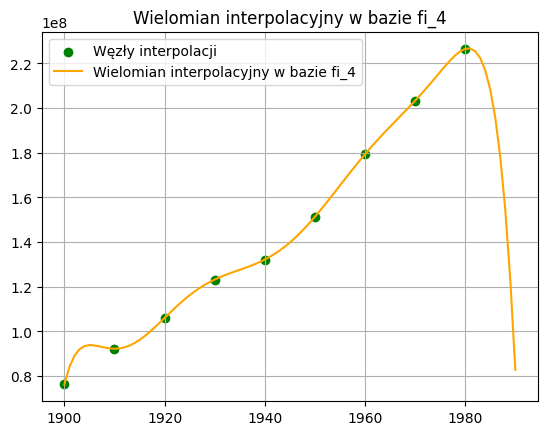

In [33]:
xs = np.arange(1900,1991,1)
ys = np.array([horner(phi4(t,2),interpolation_factors) for t in xs])
plt.title("Wielomian interpolacyjny w bazie fi_4")
plt.scatter(years,population, color="green", label="Węzły interpolacji")
plt.grid()
plt.plot(xs,ys, color="orange", label="Wielomian interpolacyjny w bazie fi_4")
plt.legend()
plt.show()

In [34]:
#Ekstrapolacja wielomianu dla 1990
predicted_value = ys[-1]
actual_value = 248709873
error = np.abs(predicted_value - actual_value)/actual_value
print(f"Błąd względny: {error}")



Błąd względny: 0.6672864651416454


In [39]:
#Interpolacja Lagrange'a
def lagrange(x, xs, ys):
    n = len(xs)
    y = 0
    for i in range(n):
        p = 1
        for j in range(n):
            if i != j:
                p = p * (x - xs[j])/(xs[i] - xs[j])
        y = y + p * ys[i]
    return y

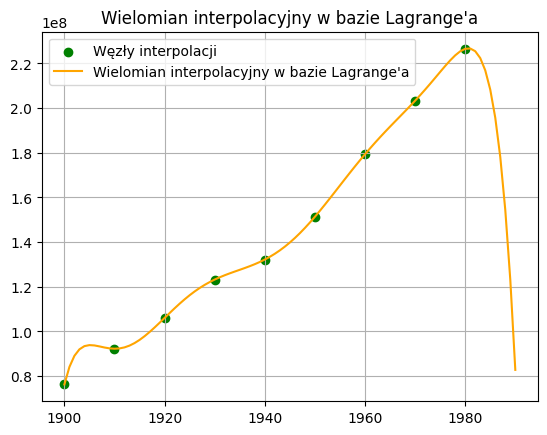

In [40]:
xs = np.arange(1900,1991,1)
ys = np.array([lagrange(x, years, population) for x in xs])
plt.title("Wielomian interpolacyjny w bazie Lagrange'a")
plt.scatter(years,population, color="green", label="Węzły interpolacji")
plt.grid()
plt.plot(xs,ys, color="orange", label="Wielomian interpolacyjny w bazie Lagrange'a")
plt.legend()
plt.show()


In [41]:
#Newton's interpolation
def divided_diff(x, y):
    '''
    function to calculate the divided
    differences table
    '''
    n = len(y)
    coef = np.zeros([n, n])
    # the first column is y
    coef[:,0] = y
    
    for j in range(1,n):
        for i in range(n-j):
            coef[i][j] = \
           (coef[i+1][j-1] - coef[i][j-1]) / (x[i+j]-x[i])
            
    return coef

def newton_poly(coef, x_data, x):
    '''
    evaluate the newton polynomial 
    at x
    '''
    n = len(x_data) - 1 
    p = coef[n]
    for k in range(1,n+1):
        p = coef[n-k] + (x -x_data[n-k])*p
    return p

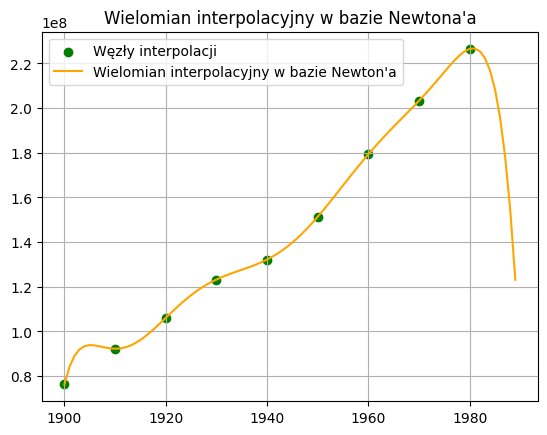

In [42]:
a_s = divided_diff(years, population)[0, :]

xs = np.arange(1900,1990,1)
ys = newton_poly(a_s, years, xs)

plt.title("Wielomian interpolacyjny w bazie Newtona'a")
plt.scatter(years,population, color="green", label="Węzły interpolacji")
plt.grid()
plt.plot(xs,ys, color="orange", label="Wielomian interpolacyjny w bazie Newton'a")
plt.legend()
plt.show()


In [43]:
#Zaokrąglenie populacji
population_rounded = np.round(population / 1e6)*1e6
population_rounded

array([7.60e+07, 9.20e+07, 1.06e+08, 1.23e+08, 1.32e+08, 1.51e+08,
       1.79e+08, 2.03e+08, 2.27e+08])

In [44]:
rounded_interpolation_factors = np.linalg.solve(matrix4, population_rounded)
print("Zaokrąglone:")
print(rounded_interpolation_factors.reshape(-1,1))
print("Niezaokrąglone:")
print(interpolation_factors.reshape(-1,1))

Zaokrąglone:
[[ 1.32000000e+08]
 [ 4.59571429e+07]
 [ 1.00141270e+08]
 [ 1.81111111e+08]
 [-3.56755556e+08]
 [-3.38488889e+08]
 [ 5.70311111e+08]
 [ 1.86920635e+08]
 [-2.94196825e+08]]
Niezaokrąglone:
[[ 1.32164569e+08]
 [ 4.61307656e+07]
 [ 1.02716315e+08]
 [ 1.82527130e+08]
 [-3.74614715e+08]
 [-3.42668456e+08]
 [ 6.06291250e+08]
 [ 1.89175576e+08]
 [-3.15180235e+08]]


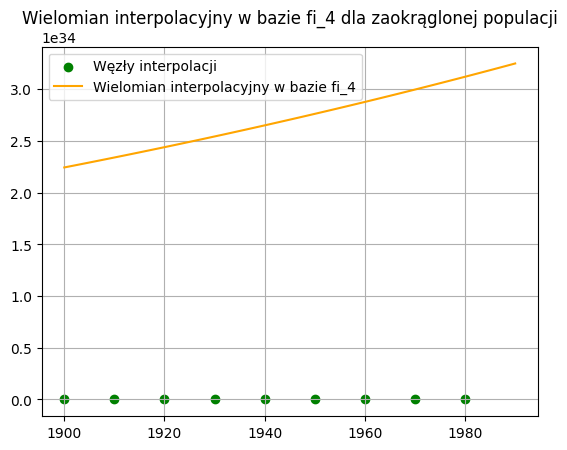

In [88]:
xs = np.arange(1900,1991,1)
ys = np.polyval(rounded_interpolation_factors, xs)
plt.title("Wielomian interpolacyjny w bazie fi_4 dla zaokrąglonej populacji")
plt.scatter(years,population, color="green", label="Węzły interpolacji")
plt.grid()
plt.plot(xs,ys, color="orange", label="Wielomian interpolacyjny w bazie fi_4")
plt.legend()
plt.show()

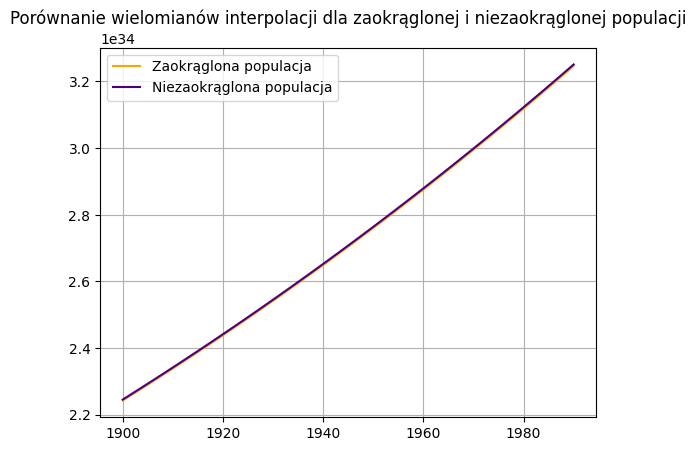

In [92]:
xs = np.arange(1900,1991,1)
ys1 = np.polyval(rounded_interpolation_factors, xs)
ys2 = np.polyval(interpolation_factors,xs)
plt.title("Porównanie wielomianów interpolacji dla zaokrąglonej i niezaokrąglonej populacji")
plt.grid()
plt.plot(xs,ys1, color="orange", label="Zaokrąglona populacja")
plt.plot(xs,ys2, color="indigo", label="Niezaokrąglona populacja")
plt.legend()
plt.show()
#Są identyczne